<a href="https://colab.research.google.com/github/OEduardoGL/Laccan_DataScience/blob/main/Apresenta%C3%A7%C3%A3o_LACCAN_Eduardo_e_T%C3%A9rcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

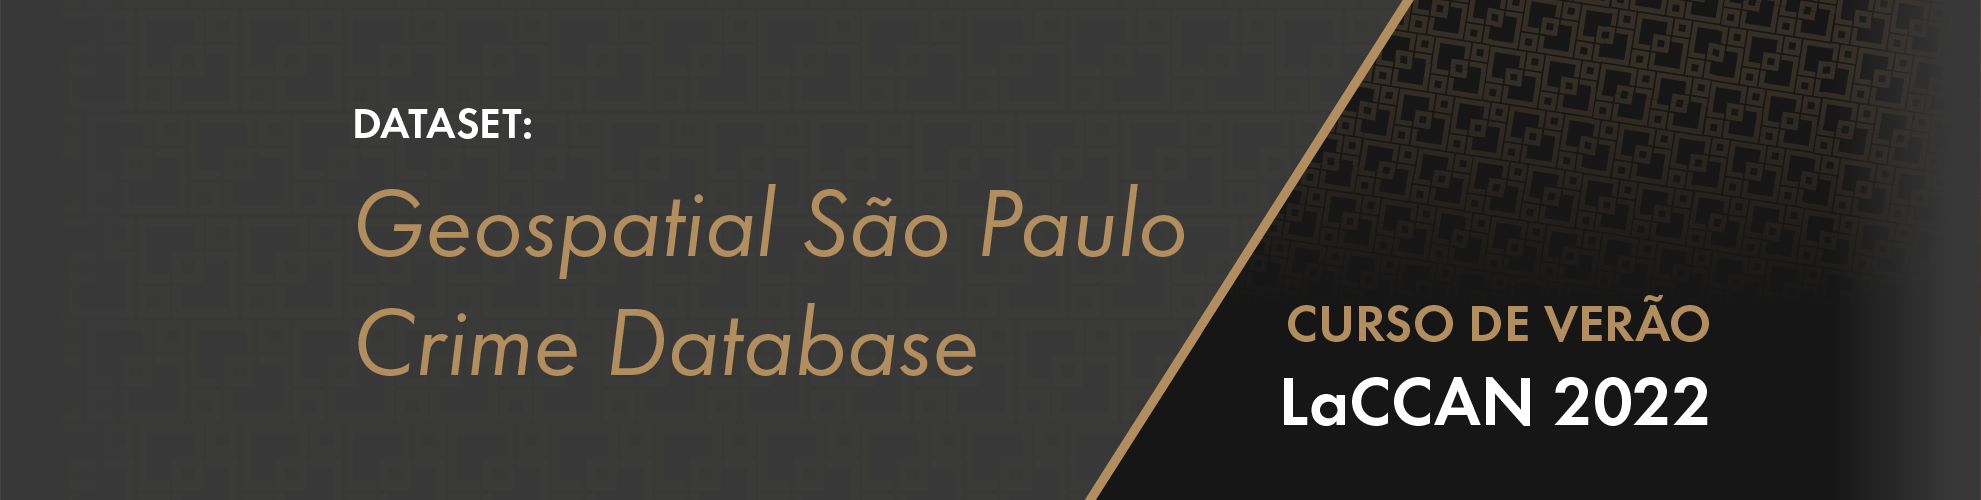

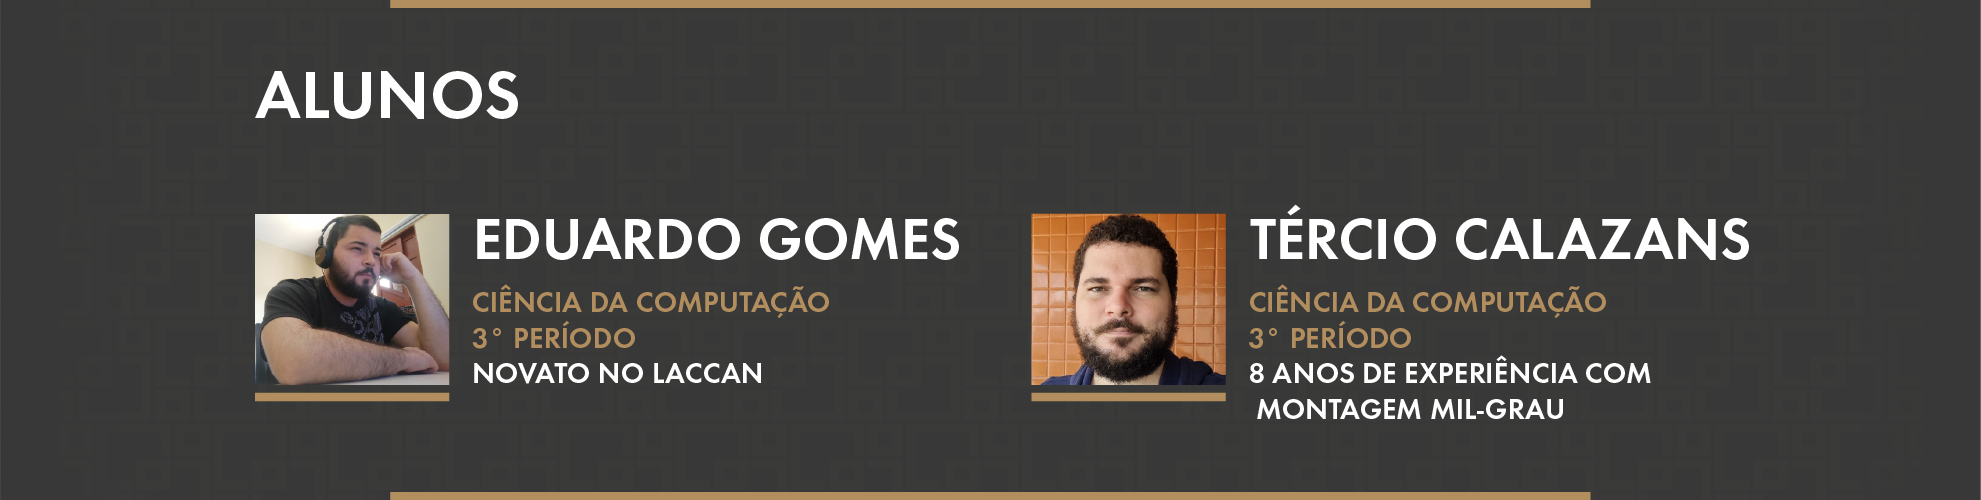

## Instalação do GeoPandas

In [ ]:
!pip install geopandas


     |████████████████████████████████| 1.0 MB 6.7 MB/s 
     |████████████████████████████████| 16.7 MB 36.7 MB/s 
     |████████████████████████████████| 6.3 MB 44.4 MB/s 


## Importando Bibliotecas

In [ ]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px

from os import path
from PIL import Image
from google.colab import drive

from urllib.request import urlopen
import json

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Definindo Caminhos

In [ ]:
path = '/content/drive/MyDrive/laccan2022/'
path + 'dataset.csv'

df = pd.read_csv(path + 'dataset.csv')

## Exibição do Dataframe
Dataframe inalterado.

In [ ]:
display(df)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12894,75152,Jardim das Camelias,2016-12-02 21:21:37.333,Estava voltando da faculdade sozinha quando ao...,"R. José Luís Monteiro, 157-221 - Jardim das Ca...",75152,189.100.243.242,-23.727163,-46.712120,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-17 23:00:00.000
12895,16908,Jardim Paulista,2014-03-25 01:26:59.730,ndçãagadirL Anônio para pgar um ônibu ir pro ...,"Avenida São Gabriel, 201 - Jardim Paulista, Sã...",16908,189.38.212.209,-23.581372,-46.670683,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-03 18:30:00.000
12896,78360,Vila Joao Ramalho,2017-03-04 12:35:27.990,Estava no ônibus voltando pra casa no ponto fi...,"R. Dom Henrique, 2 - Vila Joao Ramalho, Santo ...",78360,177.103.229.244,-23.713219,-46.509625,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-03 13:15:00.000
12897,3080,Campo Belo,2013-08-16 17:38:04.049,Um carro me seguiu quando saí do supermercado...,"Rua Acalifas, 52 - Campo Belo, São Paulo, 0462...",3080,200.161.48.250,-23.629757,-46.669933,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-03-02 21:01:00.000


## Tratamento de Dados


*   Remover linhas e colunas irrelevantes
*   Separar Data e Hora




In [ ]:
# Dividir a coluna "time" em duas colunas específicas, "data" e "hora"
df['data'] = pd.to_datetime(df['time']).dt.date
df['hora'] = pd.to_datetime(df['time']).dt.time

# Remover localidades inadequadas da coluna "bairro"
limite = 50 
for col in df.columns:
    value_counts = df['bairro'].value_counts()
    to_remove = value_counts[value_counts <= limite].index
    df[col].replace(to_remove, np.nan, inplace=True)

# Remover todas as linhas onde o valor de "bairro" for "São Paulo"
df = df[df.bairro != 'São Paulo']

# Remover todas as linhas onde o valor de "bairro" estiver vazio
df = df.dropna(subset=['bairro'], how='all')

# Remover colunas com informações irrelevantes
df.drop(['id.1', 'ip_address_origin', 'registrou_bo', 'tipo_assalto_id','user_id'], axis=1, inplace=True)

# Remover linhas com informações vazias/falsas/NaN
df = df.dropna( how='all', subset=['Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito', 'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos', 'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook', 'Outros', 'Relógio', 'Som', 'Tablet', 'Tv'])

display(df)

,id,bairro,created_at,descricao,endereco,latitude,longitude,sexo,titulo,uri,...,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time,data,hora
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",-23.580973,-46.719192,0,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,...,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000,2010-12-20,20:30:00
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",-23.540105,-46.462872,1,Rádio do Carro Furtado,/denuncias/z6nRrz-radio-do-carro-furtado,...,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000,2012-01-11,14:00:00
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,-23.541765,-46.469562,1,Rádio do carro furtado no estacionamento PAGO ...,/denuncias/V9lNKa-radio-do-carro-furtado-no-es...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000,2012-01-11,14:00:00
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",-23.611693,-46.725935,0,Quebraram a janela do meu carro,/denuncias/a4NB1e-quebraram-a-janela-do-meu-carro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000,2012-01-11,18:20:00
5,14160,Butantã,2013-12-02 14:17:28.941,Ao sair do carro para abrir o portaõ dois indi...,"Rua Júlia Della Nina, 6-28 - Butantã, São Paul...",-23.573288,-46.730640,1,Levaram o carro quando saí para abrir o portão...,/denuncias/zE4G1e-levaram-o-carro-quando-sai-p...,...,NaN,True,NaN,NaN,NaN,NaN,NaN,2012-01-10 21:15:00.000,2012-01-10,21:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12862,42239,Bela Vista,2014-12-07 10:42:14.130,Andando pela paulista dois homens na bicicleta...,"Avenida Paulista, 1009 - Bela Vista, São Paulo...",-23.565226,-46.652119,1,Assalto a mão armada por homens na bicicleta,/denuncias/VdWy8a-assalto-a-mao-armada-por-hom...,...,NaN,NaN,NaN,True,NaN,NaN,NaN,2014-12-07 07:00:00.000,2014-12-07,07:00:00
12872,48376,Rio Pequeno,2015-04-23 05:04:43.782,Um adulto e uma criança abordaram numa motocic...,"Rua Frei Inácio da Conceição, 240, Rio Pequeno",-23.571129,-46.742574,1,Tentativa de assalto na volta da aula,/denuncias/zy4nle-tentativa-de-assalto-na-volt...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,2015-11-19 23:15:00.000,2015-11-19,23:15:00
12895,16908,Jardim Paulista,2014-03-25 01:26:59.730,ndçãagadirL Anônio para pgar um ônibu ir pro ...,"Avenida São Gabriel, 201 - Jardim Paulista, Sã...",-23.581372,-46.670683,0,"Fui assaltada saindo do trabalho, indo para o ...",/denuncias/eXwB4V-fui-assaltada-saindo-do-trab...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-03 18:30:00.000,2012-03-03,18:30:00
12897,3080,Campo Belo,2013-08-16 17:38:04.049,Um carro me seguiu quando saí do supermercado...,"Rua Acalifas, 52 - Campo Belo, São Paulo, 0462...",-23.629757,-46.669933,0,Assaltada na frente de casa.Pegou minha bolsa ...,/denuncias/epbdGa-assaltada-na-frente-de-casa-...,...,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-03-02 21:01:00.000,2012-03-02,21:01:00


## Mapa do Crime em São Paulo

In [ ]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="id", hover_data=[ "bairro", "data", "hora", "valor_prejuizo"],
                        color_discrete_sequence=["#b28e5f"], zoom=10, height=500, width=900)
fig.update_layout(mapbox_style="dark", mapbox_accesstoken='pk.eyJ1IjoidGhlcmNpbyIsImEiOiJjbDB2cXJtMTkxNzB2M2NycHY0M2h0MDNvIn0.pedE6eZhD1TLj4q8KIcDww')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Gráfico 1 \\\ Frequência de crimes durante o dia:



In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['hora'] = df['time'].dt.hour

In [ ]:
px.histogram(df,x='hora',title='FREQUÊNCIA DE CRIMES DURANTE O DIA', color_discrete_sequence=['#b28e5f']).update_layout(title_font_size=28,xaxis_title="Horário",yaxis_title="Número de Crimes",bargap=0.1, plot_bgcolor='#181818',paper_bgcolor='#161616',font_color='#fff').update_xaxes(dtick="D1").update_yaxes(gridcolor='#363636')

## Gráfico 2 \\\ Número de crimes por bairro:

In [ ]:
px.histogram(df,x='bairro',title='NÚMERO DE CRIMES POR BAIRRO', color_discrete_sequence=['#b28e5f']).update_layout(title_font_size=28,xaxis_title="Bairros",yaxis_title="Número de Crimes",bargap=0.1, plot_bgcolor='#181818',paper_bgcolor='#161616',font_color='#fff').update_xaxes(dtick="D1",gridcolor='#363636',categoryorder= 'total descending').update_yaxes(gridcolor='#363636')

## Gráfico 3 \\\ Número de objetos roubados:

In [ ]:
px.histogram(df,y=['Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito', 'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos', 'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook', 'Outros', 'Relógio', 'Som', 'Tablet', 'Tv'],title='NÚMERO DE OBJETOS ROUBADOS').update_layout(legend_title='Objetos Roubados',title_font_size=28,xaxis_title="Total de Objetos Roubados",yaxis_title=" ",bargap=0.1, plot_bgcolor='#181818',paper_bgcolor='#161616',font_color='#fff').update_xaxes(gridcolor='#363636',categoryorder= 'total descending').update_yaxes(gridcolor='#363636')

## Gráfico 4 \\\ Crimes cometidos nos ***5 bairros menos perigosos***:

In [ ]:
df.bairro.value_counts()
top = list(dict(df.bairro.value_counts()).keys())[-5:]
fig = px.histogram(df[df['bairro'].str.contains('|'.join(top)).any(level=0)], x="hora", color="bairro",title='CRIMES COMETIDOS NOS 5 BAIRROS MENOS PERIGOSOS').update_layout(legend_title='Bairros',title_font_size=28,xaxis_title="Hora",yaxis_title="Número de Crimes",bargap=0.1, plot_bgcolor='#181818',paper_bgcolor='#161616',font_color='#fff').update_xaxes(dtick="D1", gridcolor='#363636',categoryorder= 'total descending').update_yaxes(gridcolor='#363636')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()



## Gráfico 5 \\\ Crimes cometidos nos ***5 bairros mais perigosos***:

In [ ]:
df.bairro.value_counts()
top = list(dict(df.bairro.value_counts()).keys())[:5]
fig = px.histogram(df[df['bairro'].str.contains('|'.join(top)).any(level=0)], x="hora", color="bairro",title='CRIMES COMETIDOS NOS 5 BAIRROS MAIS PERIGOSOS').update_layout(legend_title='Bairros',title_font_size=28,xaxis_title="Hora",yaxis_title="Número de Crimes",bargap=0.1, plot_bgcolor='#181818',paper_bgcolor='#161616',font_color='#fff').update_xaxes(dtick="D1",gridcolor='#363636',categoryorder= 'total descending').update_yaxes(gridcolor='#363636')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()



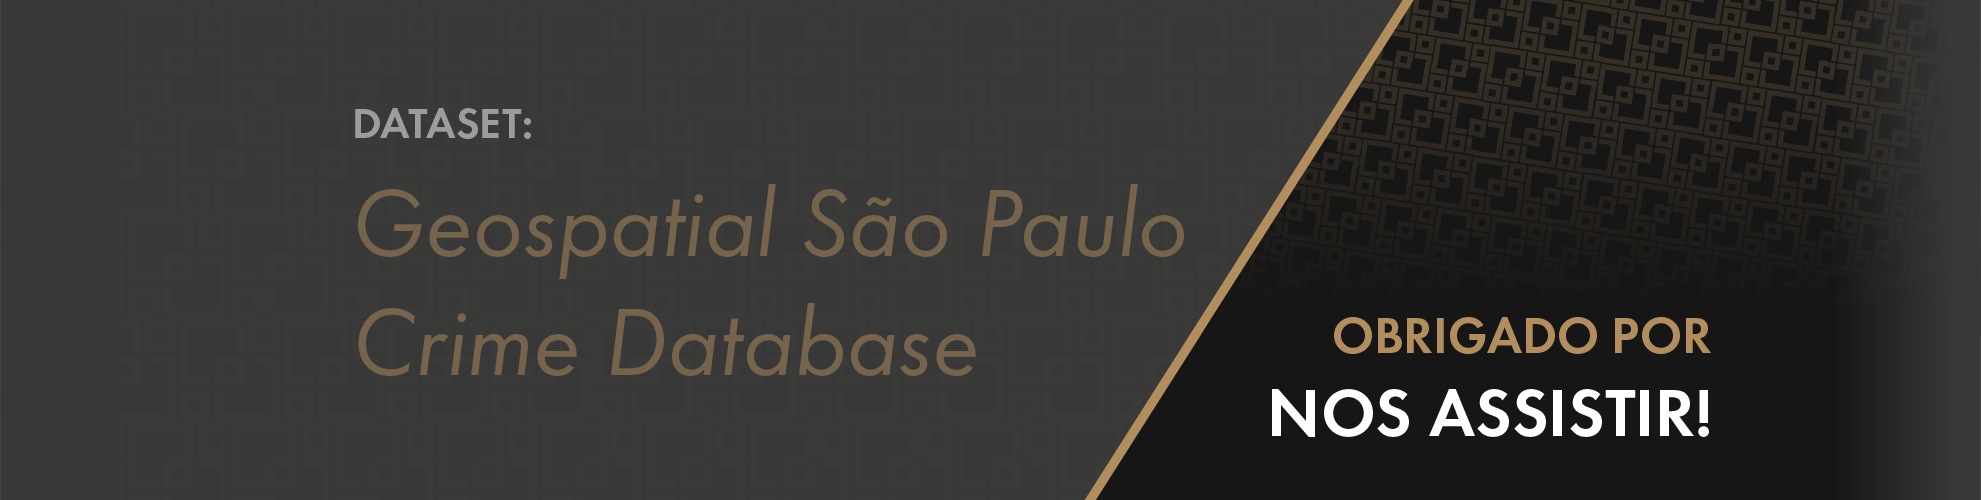